# The Effect of the Bandwidth Value

In [1]:
# solving the problem with basemap/conda
import os
os.environ['PROJ_LIB'] = 'C:/Users/Hevans/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

In [17]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import sklearn.model_selection
import sklearn.neighbors
import mpl_toolkits.basemap
seaborn.set()

In [3]:
# Create some sample data (vals) by mixing three normal distributions
x_vec = np.linspace(-30, 30, 10000)[:, np.newaxis]
np.random.seed(42)

vals = np.concatenate((
    np.random.normal(loc=1, scale=2.5, size=500),
    np.random.normal(loc=10, scale=4, size=500),
    np.random.normal(loc=-12, scale=5, size=500) ))[:, np.newaxis]

In [4]:
# define the true density curve
true_density = ((1 / 3) * scipy.stats.norm(1, 2.5).pdf(x_vec[:, 0]) + 
                (1 / 3) * scipy.stats.norm(10, 4).pdf(x_vec[:, 0]) + 
                (1 / 3) * scipy.stats.norm(-12, 5).pdf(x_vec[:, 0])
               )

In [5]:
# Define a list of tuples that will guide the creation of the multiplot graphic
position_bandwidth_vec = [(0, 0, 0.1), (0, 1, 0.4), (0, 2, 0.7),
                          (1, 0, 1.0), (1, 1, 1.3), (1, 2, 1.6),
                          (2, 0, 1.9), (2, 1, 2.5), (2, 2, 5.0)]

Each tuple contains the row and column indices of the specific subplot, and the bandwidth value used to create the estimated density in that particular subplot.

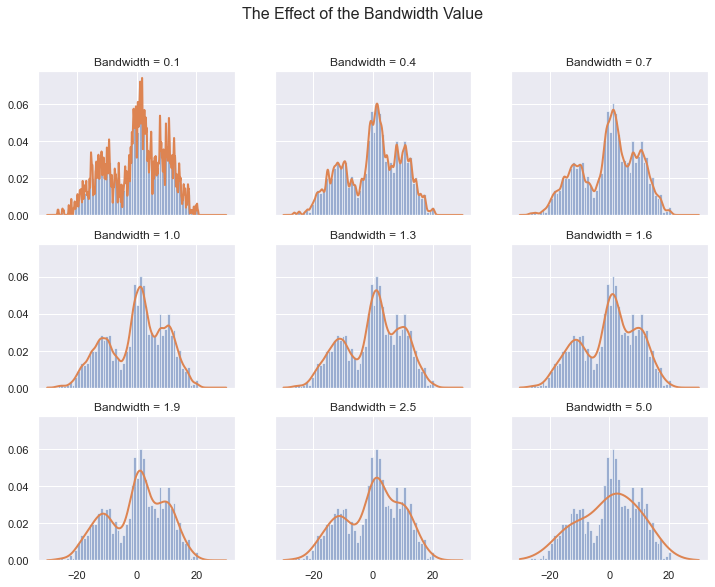

In [6]:
# Create nine plots each using a different bandwidth value
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 9))
fig.suptitle('The Effect of the Bandwidth Value', fontsize=16)

for r, c, b in position_bandwidth_vec:
    kde = sklearn.neighbors.KernelDensity(bandwidth=b).fit(vals)
    log_density = kde.score_samples(x_vec)
    ax[r, c].hist(vals, bins=50, density=True, alpha=0.5)
    ax[r, c].plot(x_vec[:, 0], np.exp(log_density), '-', linewidth=2)
    ax[r, c].set_title(f'Bandwidth = {b}')
plt.show()

# Selecting the Optimal Bandwidth Using Grid Search

In [7]:
# Define a grid of bandwidth values and the grid search cross-validation model
bandwidths = 10 ** np.linspace(-1, 1, 100)

grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.neighbors.KernelDensity(),
                                           param_grid={'bandwidth':bandwidths},
                                           cv=10)

grid.fit(vals)

GridSearchCV(cv=10, estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.319926...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [8]:
# extract the optimal bandwidth value from the model
best_bandwidth = grid.best_params_['bandwidth']
print(f'Best bandwidth value: {best_bandwidth}')

Best bandwidth value: 1.6297508346206444


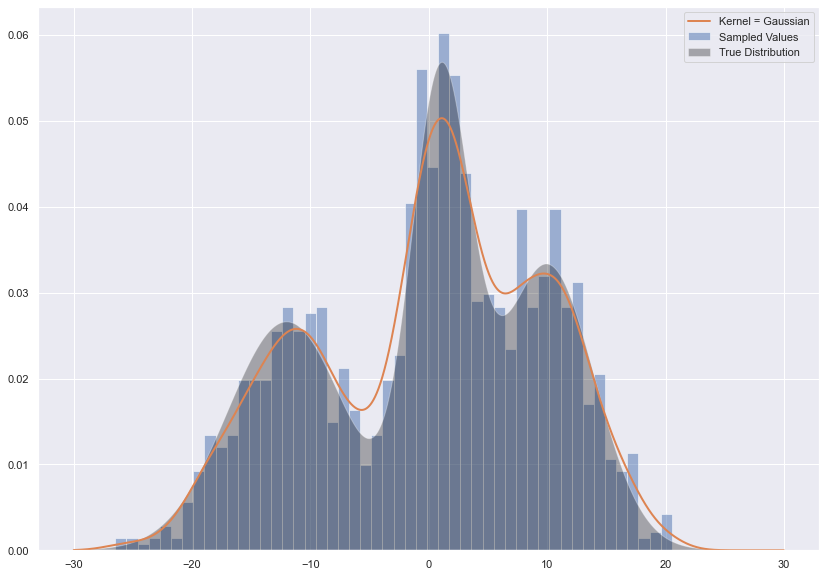

In [9]:
# Plot the histogram of the sample data overlaid by both the true and estimated densities
fig, ax = plt.subplots(figsize=(14, 10))
ax.hist(vals, bins=50, density=True, alpha=0.5, label='Sampled Values')
ax.fill(x_vec[:, 0], true_density, fc='black', alpha=0.3, label='True Distribution')
log_density = np.exp(grid.best_estimator_.score_samples(x_vec))
ax.plot(x_vec[:, 0], log_density, '-', linewidth=2, label='Kernel = Gaussian')
ax.legend(loc='upper right')
plt.show()

# The Effect of the Kernel Function 

In [10]:
# Define a list of tuples
position_kernel_vec = [(0, 0, 'gaussian'),
                      (0, 1, 'tophat'),
                      (1, 0, 'epanechnikov'),
                      (1, 1, 'exponential'),
                      (2, 0, 'linear'),
                      (2, 1, 'cosine')]

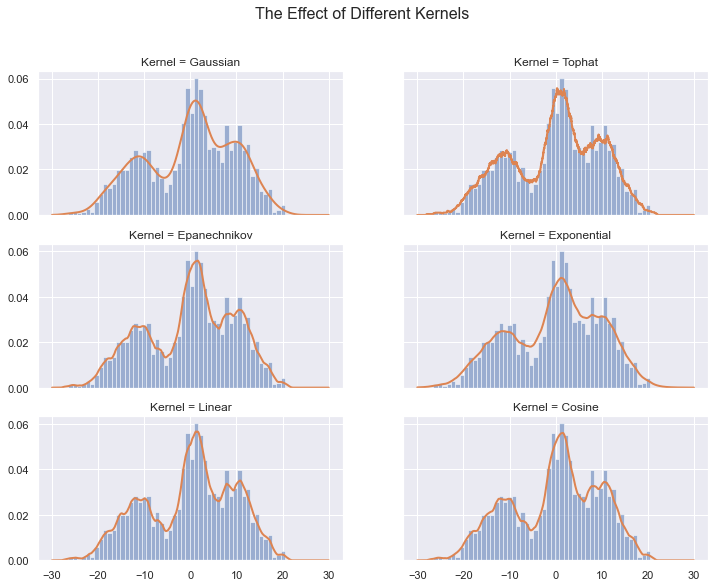

In [11]:
# Fit and plot six kernel density estimation models using a different kernel function for each
fig, ax = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(12, 9))
fig.suptitle('The Effect of Different Kernels', fontsize=16)
for r, c, k in position_kernel_vec:
    kde = sklearn.neighbors.KernelDensity(kernel=k, bandwidth=best_bandwidth).fit(vals)
    log_density = kde.score_samples(x_vec)
    ax[r, c].hist(vals, bins=50, density=True, alpha=0.5)
    ax[r, c].plot(x_vec[:, 0], np.exp(log_density), '-', linewidth=2)
    ax[r, c].set_title('Kernel = {}'.format(k.capitalize()))
plt.show()

# Simulating the Derivation of Kernel Density Estimation

In [12]:
# Define a function that will evaluate the normal distribution
def eval_gaussian(x, m, b):
    numerator = np.exp( -np.power(x - m, 2) / (2 * np.power(b, 2)) )
    denominator = b * np.sqrt(2 * np.pi)
    
    return numerator / denominator

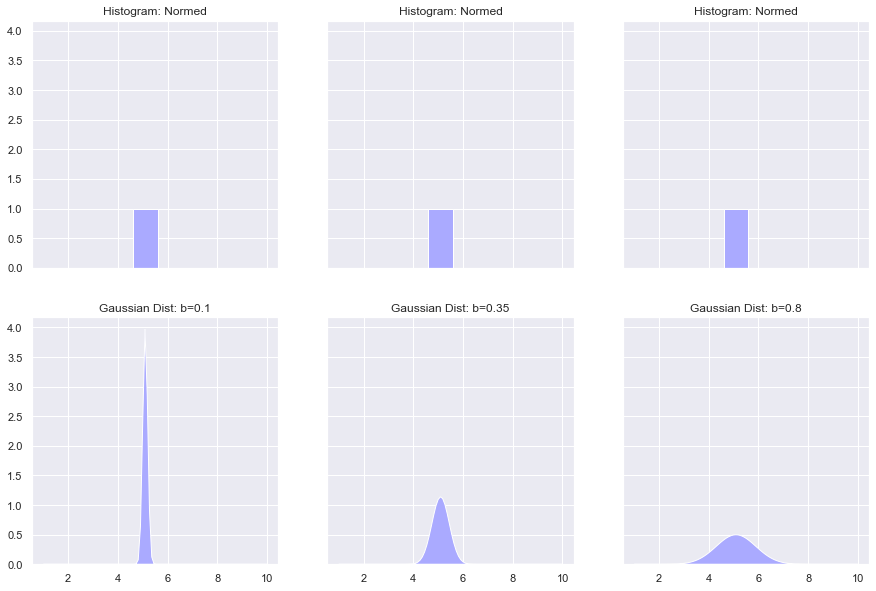

In [13]:
# Plot a single sample data point as a histogram and as an individual density with varying bandwidth values
m = np.array([5.1])
b_vec = [0.1, 0.35, 0.8]
x_vec = np.linspace(1, 10, 100)[:, None]

figOne, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
for i, b in enumerate(b_vec):
    ax[0, i].hist(m[:], bins=1, fc='#AAAAFF', density=True)
    ax[0, i].set_title("Histogram: Normed")
    evaluation = eval_gaussian(x_vec, m=m[0], b=b)
    ax[1, i].fill(x_vec, evaluation, '-k', fc='#AAAAFF')
    ax[1, i].set_title(f"Gaussian Dist: b={b}")
plt.show()

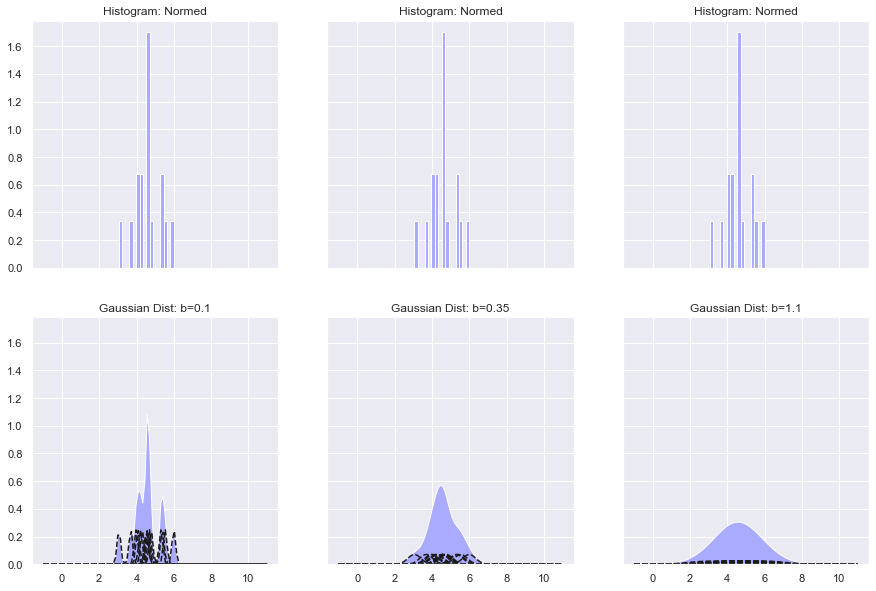

In [14]:
# Reproduce the work done, but now scale up to 16 data points
m = np.random.normal(4.7, 0.88, 16)
n = len(m)
b_vec = [0.1, 0.35, 1.1]
x_vec = np.linspace(-1, 11, 100)[:, None]
figMulti, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
for i, b in enumerate(b_vec):
    ax[0, i].hist(m[:], bins=n, fc='#AAAAFF', density=True)
    ax[0, i].set_title("Histogram: Normed")
    sum_evaluation = np.zeros(len(x_vec))
    for j in range(n):
        evaluation = eval_gaussian(x_vec, m=m[j], b=b) / n
        sum_evaluation += evaluation[:, 0]
        ax[1, i].plot(x_vec, evaluation, '-k', linestyle="dashed")
    ax[1, i].fill(x_vec, sum_evaluation, '-k', fc='#AAAAFF')
    ax[1, i].set_title(f"Gaussian Dist: b={b}")
plt.show()

# Loading Data and Modeling with Seaborn

In [15]:
# load data
df = pd.read_csv('datasets/california_housing.csv', header=0)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
# Filter the data frame on the HouseAge feature
dfLess15 = df[ df['HouseAge'] <= 15]
dfLess15 = dfLess15[['Latitude', 'Longitude']]
dfLess15.head()

,Latitude,Longitude
59,37.82,-122.29
87,37.81,-122.27
88,37.80,-122.27
391,37.90,-122.30
437,37.87,-122.30


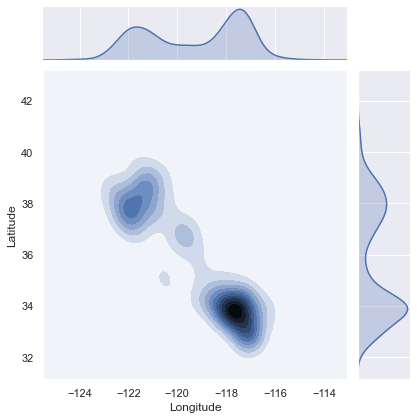

In [22]:
# Use seaborn to fit and visualize the kernel density estimation model built on the longitude and latitude data points
sns.jointplot("Longitude", "Latitude", dfLess15, kind="kde")
plt.show()

If we overlay these results on a map of California, we will see that the hotspots are southern California, including Los Angeles and San Diego, the bay area, including San Francisco, and to a small degree the area known as the central valley.

In [23]:
# Create a filtered data frame based on the HouseAge feature
dfMore40 = df[ df['HouseAge'] > 40 ]
dfMore40 = dfMore40[['Latitude', 'Longitude']]
dfMore40.head()

,Latitude,Longitude
0,37.88,-122.23
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25
5,37.85,-122.25


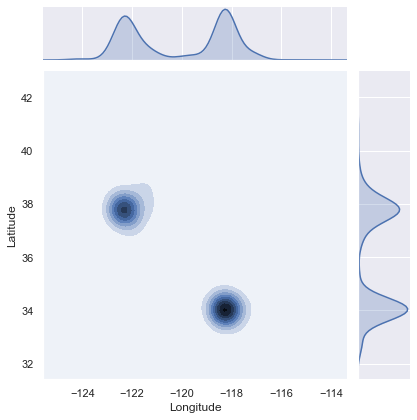

In [25]:
# Use seaborn to fit and visualize the kernel density estimation model built on the longitude and latitude data points
sns.jointplot('Longitude', 'Latitude', dfMore40, kind='kde')
plt.show()

In [26]:
# create another filtered data frame
dfLess5 = df[ df['HouseAge'] <= 5 ]
x_vals = dfLess5.Population.values
y_vals = dfLess5.MedInc.values

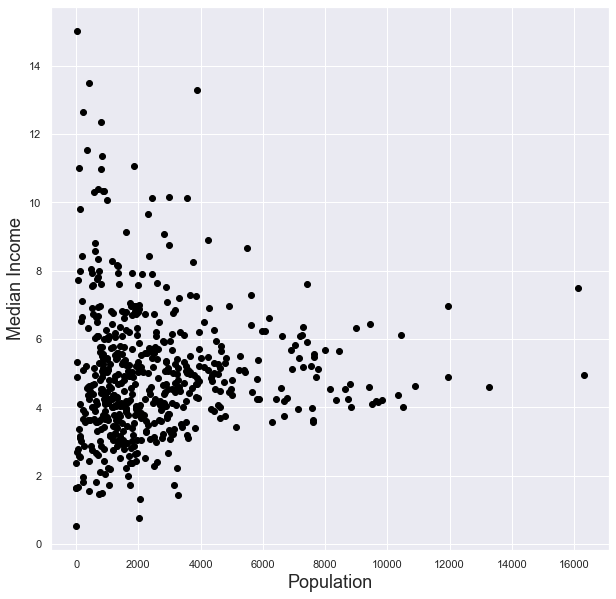

In [27]:
# Plot Population and MedInc as a scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(x_vals, y_vals, c='black')
plt.xlabel('Population', fontsize=18)
plt.ylabel('Median Income', fontsize=18)
plt.show()

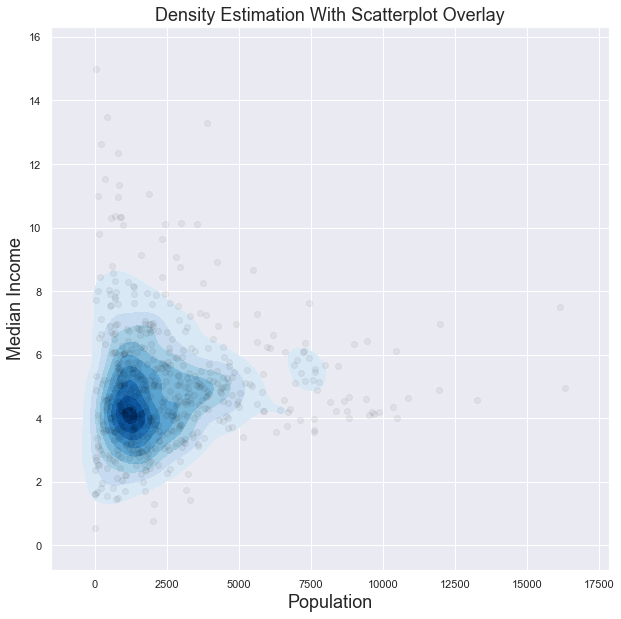

In [30]:
# Use yet another seaborn function to fit a kernel density estimation model
plt.figure(figsize=(10, 10))
ax = sns.kdeplot(x_vals, y_vals,
                     kernel='gau',
                     cmap='Blues',
                     shade=True,
                     shade_lowest=False)
plt.scatter(x_vals, y_vals, c='black', alpha=0.05)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Median Income', fontsize=18)
plt.title('Density Estimation With Scatterplot Overlay', size=18)
plt.show()

# Working with Basemap

In [31]:
# Form the grid of locations over which the estimated density will be laid
xgrid15 = np.sort(list(dfLess15['Longitude']))
ygrid15 = np.sort(list(dfLess15['Latitude']))
x15, y15 = np.meshgrid(xgrid15, ygrid15)
print(f'X Grid Component:\n{x15}')
print(f'Y Grid Component:\n{y15}')
xy15 = np.vstack([y15.ravel(), x15.ravel()]).T

X Grid Component:
[[-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]
 [-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]
 [-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]
 ...
 [-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]
 [-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]
 [-124.23 -124.19 -124.17 ... -114.63 -114.57 -114.31]]
Y Grid Component:
[[32.54 32.54 32.54 ... 32.54 32.54 32.54]
 [32.55 32.55 32.55 ... 32.55 32.55 32.55]
 [32.55 32.55 32.55 ... 32.55 32.55 32.55]
 ...
 [41.74 41.74 41.74 ... 41.74 41.74 41.74]
 [41.75 41.75 41.75 ... 41.75 41.75 41.75]
 [41.78 41.78 41.78 ... 41.78 41.78 41.78]]


In [32]:
# Define and fit a kernel density estimation model
kde15 = sklearn.neighbors.KernelDensity(bandwidth=0.05,
                                       metric='minkowski',
                                       kernel='gaussian',
                                       algorithm='ball_tree')
kde15.fit(dfLess15.values)

KernelDensity(algorithm='ball_tree', bandwidth=0.05, metric='minkowski')

In [33]:
# Fit the trained model on the xy grid and print the shape 
log_density = kde15.score_samples(xy15)
density = np.exp(log_density)
density = density.reshape(x15.shape)
print(f'Shape of Density Values:\n{density.shape}')

Shape of Density Values:
(3287, 3287)


C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


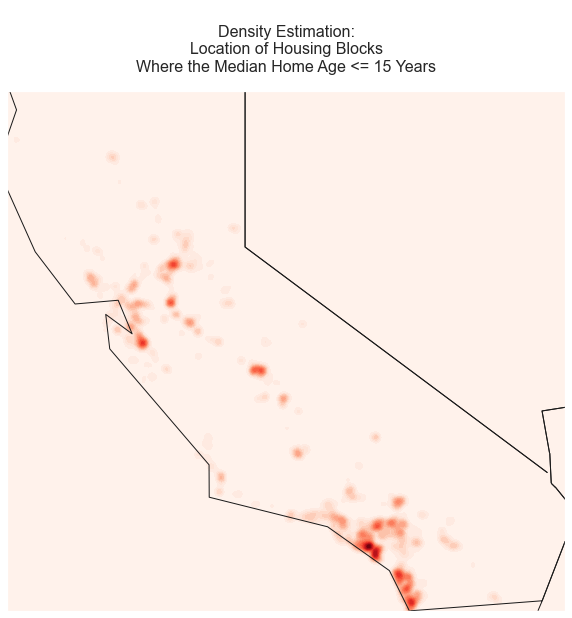

In [34]:
# Create an outline of California and overlay the estimated density computed
fig15 = plt.figure(figsize=(10, 10))
fig15.suptitle(
    """
    Density Estimation:
    Location of Housing Blocks
    Where the Median Home Age <= 15 Years
    """, 
    fontsize=16
)

the_map = mpl_toolkits.basemap.Basemap(
    projection='cyl',
    llcrnrlat=y15.min(), urcrnrlat=y15.max(),
    llcrnrlon=x15.min(),urcrnrlon=x15.max(),
    resolution='c'
)

the_map.drawcoastlines(linewidth=1)
the_map.drawcountries(linewidth=1)
the_map.drawstates(linewidth=1)

levels = np.linspace(0, density.max(), 25)
plt.contourf(x15, y15, density, levels=levels, cmap=plt.cm.Reds)

plt.show()

In [35]:
# Form the grid of locations over which the estimated density will be laid
xgrid40 = np.sort(list(dfMore40['Longitude']))
ygrid40 = np.sort(list(dfMore40['Latitude']))
x40, y40 = np.meshgrid(xgrid40, ygrid40)
print(f"X Grid Component:\n{x40}\n")
print(f"Y Grid Component:\n{y40}\n")
xy40 = np.vstack([y40.ravel(), x40.ravel()]).T

X Grid Component:
[[-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]
 [-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]
 [-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]
 ...
 [-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]
 [-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]
 [-124.35 -124.26 -124.23 ... -114.61 -114.6  -114.59]]

Y Grid Component:
[[32.64 32.64 32.64 ... 32.64 32.64 32.64]
 [32.66 32.66 32.66 ... 32.66 32.66 32.66]
 [32.66 32.66 32.66 ... 32.66 32.66 32.66]
 ...
 [41.43 41.43 41.43 ... 41.43 41.43 41.43]
 [41.73 41.73 41.73 ... 41.73 41.73 41.73]
 [41.78 41.78 41.78 ... 41.78 41.78 41.78]]



In [36]:
# Define and fit a kernel density estimation model
kde40 = sklearn.neighbors.KernelDensity(bandwidth=0.05,
                                        metric='minkowski',
                                        kernel='gaussian',
                                        algorithm='ball_tree')
kde40.fit(dfMore40.values)

KernelDensity(algorithm='ball_tree', bandwidth=0.05, metric='minkowski')

In [37]:
# Fit the trained model on the xy grid and print the shape 
log_density = kde40.score_samples(xy40)
density = np.exp(log_density)
density = density.reshape(x40.shape)
print(f"Shape of Density Values:\n{density.shape}\n")

Shape of Density Values:
(3878, 3878)



C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\Hevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


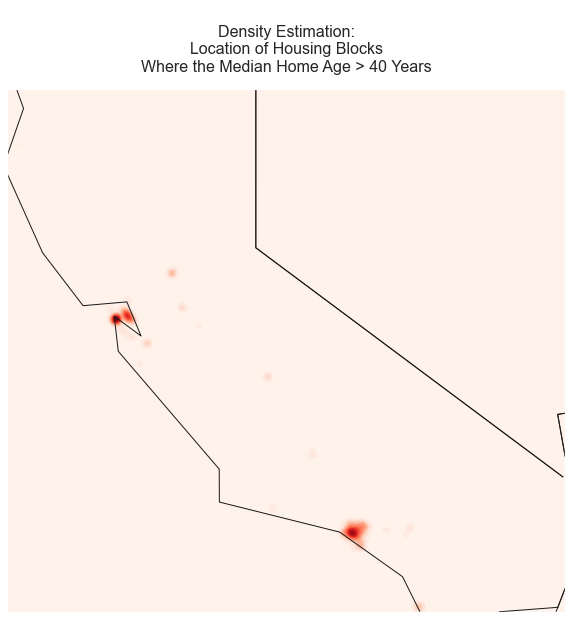

In [38]:
# Create an outline of California and overlay the estimated density computed
fig40 = plt.figure(figsize=(10, 10))
fig40.suptitle(
    """
    Density Estimation:
    Location of Housing Blocks
    Where the Median Home Age > 40 Years
    """, 
    fontsize=16
)

the_map = mpl_toolkits.basemap.Basemap(
    projection='cyl',
    llcrnrlat=y40.min(), urcrnrlat=y40.max(),
    llcrnrlon=x40.min(),urcrnrlon=x40.max(),
    resolution='c'
)

the_map.drawcoastlines(linewidth=1)
the_map.drawcountries(linewidth=1)
the_map.drawstates(linewidth=1)

levels = np.linspace(0, density.max(), 25)
plt.contourf(x40, y40, density, levels=levels, cmap=plt.cm.Reds)

plt.show()